# ML MODELS FOR EMG CLASSIFICATION

# Importing the libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
# Importing the train_set
train_dataset = pd.read_csv('trainset_60.csv')
X_train = train_dataset.iloc[:, :-1].values
y_train = train_dataset.iloc[:, -1].values

In [3]:
# Importing the dev_set
dev_dataset = pd.read_csv('validate_20.csv')
X_dev = dev_dataset.iloc[:, :-1].values
y_dev = dev_dataset.iloc[:, -1].values

In [4]:
# Importing the test_set
test_dataset = pd.read_csv('testset_20.csv')
X_test = test_dataset.iloc[:, :-1].values
y_test = test_dataset.iloc[:, -1].values

# Feature Scaling

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_dev = sc.fit_transform(X_dev)
X_test = sc.transform(X_test)

# Dataset Analysis

In [6]:
print(X_train)

[[-1.90815765 -2.07145225 -1.65976075 ...  0.28777429  0.10169213
  -1.28297814]
 [-1.54060044 -1.75309426 -1.23159258 ...  0.48136172 -0.06873272
  -1.59648631]
 [-1.57129911 -2.08981807 -1.46895219 ...  0.27404184 -0.73910521
  -0.12443136]
 ...
 [ 2.13391584  1.78339061  2.18649685 ... -0.3352874   0.51414358
  -1.78324017]
 [ 1.67669939  1.44978949  1.9996626  ...  0.09095603  0.40732187
  -1.40817977]
 [ 1.67393146  1.64460677  2.12679152 ...  0.09353653  0.32284431
  -2.13229583]]


In [7]:
print(X_dev)

[[-1.61878804 -1.96346788 -1.51493239 ...  0.42753289 -0.58065494
  -1.47258398]
 [-1.11283496 -2.08258309 -1.4206058  ...  0.42297098 -0.13847814
  -0.29632955]
 [-0.91098495 -1.98802451 -1.42193222 ...  0.29841291  0.37169066
  -0.88285218]
 ...
 [ 1.87246561  2.00294689  2.3221959  ... -0.08439382  0.33340883
  -2.70096261]
 [ 1.64101472  1.78724614  2.54077962 ... -0.55195137  0.22116299
  -1.68610678]
 [ 1.59631904  1.61827611  2.17404237 ... -0.06295117  0.25410034
  -1.93063644]]


In [8]:
print(X_test)

[[-0.91792421 -1.83075678 -1.4311876  ...  0.20600426  0.34229093
  -1.17610739]
 [-0.84517292 -1.92407844 -1.40438908 ...  0.25326965 -0.85664689
  -1.03121374]
 [-1.35877182 -2.07581788 -1.40230985 ...  0.43330661 -0.30244812
  -1.47309306]
 ...
 [ 1.61851352  1.40961467  2.12820158 ...  0.03408372  0.15318471
  -2.18941563]
 [ 1.66925428  1.64115399  2.33362096 ... -0.31589099  0.55278223
  -2.17871956]
 [ 1.9255842   1.62686538  2.61796835 ...  0.08216561  0.47762526
  -1.65086725]]


In [9]:
np.shape(X_train)

(19776, 42)

In [10]:
np.shape(X_dev)

(7040, 42)

In [11]:
np.shape(X_test)

(7040, 42)

In [12]:
np.shape(y_train)

(19776,)

In [13]:
y_train

array([1, 1, 1, ..., 8, 8, 8], dtype=int64)

In [14]:
np.shape(y_dev)

(7040,)

In [15]:
np.shape(y_test)

(7040,)

In [16]:
y_test

array([1, 1, 1, ..., 8, 8, 8], dtype=int64)

# 1. SVM Classifier

# Model Tuning

In [17]:
from sklearn.svm import SVC

Kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i in range(len(Kernels)):
   #Preliminary Classification Model
   classifier_SVM = SVC(kernel = Kernels[i] , class_weight = 'balanced' , random_state = 0)
    
   #fit model to dev set   
   classifier_SVM.fit(X_train, y_train)
   
   #predict results for dev set
   y_pred_SVM = classifier_SVM.predict(X_dev)

   #Cross Validation metrics
   from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
    
   #confusion matrix   
   cm = confusion_matrix(y_dev, y_pred_SVM)

   #accuracy
   accuracy = accuracy_score(y_dev, y_pred_SVM)

   #F1 score    
   f1_score = f1_score(y_dev, y_pred_SVM, average='weighted')

   print('kernel:{}'.format(Kernels[i]))
   print("accuracy:{}".format(accuracy))   
   print("f1_score:{}".format(f1_score))
   print("cm:{}".format(cm))
   print("--------------------------------------------------------------------------------------------------------------------")

kernel:linear
accuracy:0.9715909090909091
f1_score:0.9716775756851472
cm:[[894   0   0   0   0   0   0   0]
 [  0 882   0   0   0   0   0   0]
 [  0   0 876   2   0   0   0   0]
 [  0   0   7 827   1   3  42   1]
 [  0   0   1   0 883   0   0   0]
 [  0   1   8   6   0 874   6   0]
 [  0   0   0  50   0  10 818   0]
 [  1   0  21  40   0   0   0 786]]
--------------------------------------------------------------------------------------------------------------------
kernel:poly
accuracy:0.9599431818181818
f1_score:0.9601651369124885
cm:[[886   0   1   1   0   6   0   0]
 [  0 878   0   1   0   3   0   0]
 [  0   0 870   3   0   5   0   0]
 [  0   0   2 794   2  26  57   0]
 [  0   0   2   0 875   7   0   0]
 [  0   3   4   9   0 870   9   0]
 [  0   0   0  44   0  37 797   0]
 [  0   0   2  55   0   2   1 788]]
--------------------------------------------------------------------------------------------------------------------
kernel:rbf
accuracy:0.9789772727272728
f1_score:0.9789483890

# MODEL WITH SELECTED PARAMETERS

In [18]:
#model was tuned to check for best params and it was found that
#among all the Kernels checked the rbf kernel had the best
#accuracy and F1 Score while fitting the model in dev set.....

In [19]:
#TRAINING DATA(for final model): X_train_ovr: X_train + X_dev, y_train_ovr=y_train+y_dev
#TEST DATA: X_test,y_test
X_train_ovr = np.concatenate((X_train,X_dev),0)

In [20]:
np.shape(X_train_ovr)

(26816, 42)

In [21]:
y_train_ovr = np.concatenate((y_train,y_dev),0)

In [22]:
np.shape(y_train_ovr)

(26816,)

In [23]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'rbf', class_weight = 'balanced', random_state = 0)
classifier_SVM.fit(X_train_ovr, y_train_ovr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# Predicting results for Test Set

In [24]:
# Predicting the Test set results
y_results_SVM = classifier_SVM.predict(X_test)

In [25]:
print(np.concatenate((y_results_SVM.reshape(len(y_results_SVM),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [8 8]
 [8 8]
 [8 8]]


# Cross Validation For SVM Classification Model

accuracy:0.9863636363636363
f1_score:0.9863337694779619
recall_score:0.9863636363636363
precision_score:0.9863636363636363


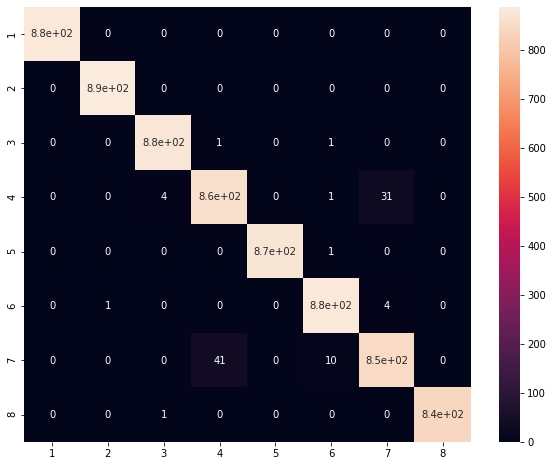

In [26]:
#Cross Validation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score,precision_score
    
#confusion matrix   
cm_svm = confusion_matrix(y_test, y_results_SVM)
array = cm_svm 
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)
#accuracy
accuracy_svm = accuracy_score(y_test, y_results_SVM)
print("accuracy:{}".format(accuracy_svm))
#F1 score    
f1_score_svm = f1_score(y_test, y_results_SVM, average='weighted')
print("f1_score:{}".format(f1_score_svm))
#Recall score
recall_score_svm = recall_score(y_test, y_results_SVM, average='micro')
print("recall_score:{}".format(recall_score_svm))
#Precision score
precision_score_svm = precision_score(y_test, y_results_SVM, average='micro')
print("precision_score:{}".format(precision_score_svm))

In [27]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_SVM, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 1.00000000 1.00000000       879
           2  0.99887514 1.00000000 0.99943725       888
           3  0.99432463 0.99772210 0.99602047       878
           4  0.95348837 0.95986622 0.95666667       897
           5  1.00000000 0.99885584 0.99942759       874
           6  0.98540965 0.99433749 0.98985344       883
           7  0.96031746 0.94320713 0.95168539       898
           8  1.00000000 0.99881376 0.99940653       843

    accuracy                      0.98636364      7040
   macro avg  0.98655191 0.98660032 0.98656217      7040
weighted avg  0.98633225 0.98636364 0.98633377      7040



---

# 2.SGD Classifier

# Model Tuning

In [28]:
from sklearn.linear_model import SGDClassifier

loss = ['hinge', 'log', 'modified_huber', 'squared_hinge','perceptron','squared_loss', 'huber','epsilon_insensitive',
        'squared_epsilon_insensitive']

for i in range(len(loss)):
   #Preliminary Classification Model
   classifier_SGD = SGDClassifier(loss= loss[i], penalty='l2',alpha=0.0001,fit_intercept=True,max_iter=1000,random_state = 0,
                                  tol=0.001,shuffle=True,epsilon=0.1,learning_rate='optimal', eta0=0.0,class_weight='balanced')
                                  
    
   #fit model to dev set   
   classifier_SGD.fit(X_train, y_train)
   
   #predict results for dev set
   y_pred_SGD = classifier_SGD.predict(X_dev)

   #Cross Validation metrics
   from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
    
   #confusion matrix   
   cm = confusion_matrix(y_dev, y_pred_SGD)

   #accuracy
   accuracy = accuracy_score(y_dev, y_pred_SGD)

   #F1 score    
   f1_score = f1_score(y_dev, y_pred_SGD, average='weighted')

   print('loss:{}'.format(loss[i]))
   print("accuracy:{}".format(accuracy))   
   print("f1_score:{}".format(f1_score))
   print("cm:{}".format(cm))
   print("--------------------------------------------------------------------------------------------------------------------")

loss:hinge
accuracy:0.9676136363636364
f1_score:0.9675982765702676
cm:[[883   0   6   2   0   3   0   0]
 [  0 873   2   3   0   4   0   0]
 [  0   0 867   8   3   0   0   0]
 [  0   0   6 795   0  11  57  12]
 [  0   0   1   0 882   1   0   0]
 [  0   4  14  13   1 851  12   0]
 [  0   0   0  32   1  19 826   0]
 [  0   0   1   9   0   0   3 835]]
--------------------------------------------------------------------------------------------------------------------
loss:log
accuracy:0.9677556818181818
f1_score:0.967748593467189
cm:[[885   0   4   2   0   3   0   0]
 [  0 873   2   3   0   4   0   0]
 [  0   0 865  10   2   1   0   0]
 [  0   0   9 801   0  11  48  12]
 [  0   0   1   0 882   1   0   0]
 [  0   4  12  10   0 857  12   0]
 [  0   0   0  39   1  23 815   0]
 [  0   0   1   9   0   0   3 835]]
--------------------------------------------------------------------------------------------------------------------
loss:modified_huber
accuracy:0.9637784090909091
f1_score:0.96378685

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


loss:squared_hinge
accuracy:0.9369318181818181
f1_score:0.938104445429248
cm:[[881   0   2  10   0   1   0   0]
 [  0 872   0  10   0   0   0   0]
 [  0   0 824  32   6  16   0   0]
 [  0   0  22 783   0   7  57  12]
 [  0   0   0   7 877   0   0   0]
 [  0   4   6 127   2 734  22   0]
 [  0   0   0  76   0  12 790   0]
 [  0   0   1  10   0   0   2 835]]
--------------------------------------------------------------------------------------------------------------------
loss:perceptron
accuracy:0.9592329545454545
f1_score:0.9595209266042738
cm:[[880   0   4   7   0   3   0   0]
 [  0 871   0   7   0   4   0   0]
 [  0   0 862  12   4   0   0   0]
 [  0   0   9 790   0   6  64  12]
 [  0   0   0   9 875   0   0   0]
 [  0   4  13  48   1 818  11   0]
 [  0   0   0  42   1  13 822   0]
 [  0   0   1   9   0   0   3 835]]
--------------------------------------------------------------------------------------------------------------------
loss:squared_loss
accuracy:0.9303977272727273
f1_sco

# MODEL WITH SELECTED PARAMETERS

In [29]:
#best performance was observed for log loss

In [30]:
# Training the SGD Classification model on the Training set
from sklearn.linear_model import SGDClassifier
classifier_SGD = SGDClassifier(loss= 'log', penalty='l2', alpha=0.0001,max_iter=1000, tol=0.001,random_state = 0,
                               shuffle=True, epsilon=0.1, learning_rate='optimal',class_weight='balanced')
classifier_SGD.fit(X_train_ovr, y_train_ovr)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

# Predicting results for Test Set

In [31]:
# Predicting the Test set results
y_results_SGD = classifier_SGD.predict(X_test)

In [32]:
print(np.concatenate((y_results_SGD.reshape(len(y_results_SGD),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [8 8]
 [8 8]
 [8 8]]


# Cross Validation For SGD Classification Model

accuracy:0.9713068181818182
f1_score:0.9713105022611258
recall_score:0.9713068181818182
precision_score:0.9713068181818182


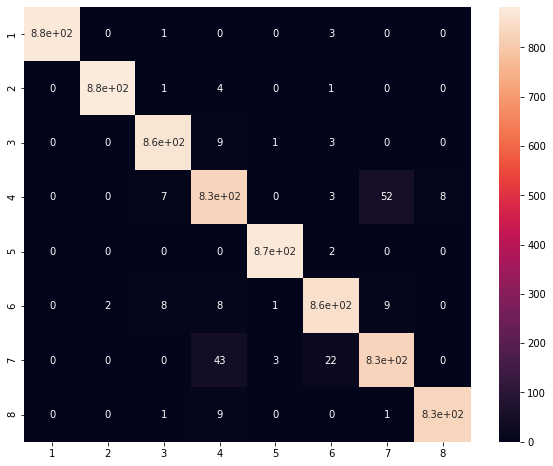

In [33]:
#Cross Validation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score,precision_score
    
#confusion matrix   
cm_sgd = confusion_matrix(y_test, y_results_SGD)
array = cm_sgd
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)
#accuracy
accuracy_sgd = accuracy_score(y_test, y_results_SGD)
print("accuracy:{}".format(accuracy_sgd))
#F1 score    
f1_score_sgd = f1_score(y_test, y_results_SGD, average='weighted')
print("f1_score:{}".format(f1_score_sgd))
#Recall score
recall_score_sgd = recall_score(y_test, y_results_SGD, average='micro')
print("recall_score:{}".format(recall_score_sgd))
#Precision score
precision_score_sgd = precision_score(y_test, y_results_SGD, average='micro')
print("precision_score:{}".format(precision_score_sgd))

In [34]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_SGD, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 0.99544937 0.99771950       879
           2  0.99773756 0.99324324 0.99548533       888
           3  0.97961495 0.98519362 0.98239637       878
           4  0.91888889 0.92196210 0.92042293       897
           5  0.99429875 0.99771167 0.99600228       874
           6  0.96175478 0.96828992 0.96501129       883
           7  0.93049327 0.92427617 0.92737430       898
           8  0.99047619 0.98695136 0.98871064       843

    accuracy                      0.97130682      7040
   macro avg  0.97165805 0.97163468 0.97164033      7040
weighted avg  0.97132630 0.97130682 0.97131050      7040



-------------------------------------------------------------------------------------------------------------------------------

# 3.Logistic Regression

# Model Tuning

In [35]:
from sklearn.linear_model import LogisticRegression
solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in range(len(solvers)):
    #Preliminary Classification Model
    classifier_logreg = LogisticRegression(penalty='l2',solver=solvers[i], max_iter= 100, multi_class='auto',random_state=0)
     #all solvers converged for max_iters = 500,while newton-cg and liblinear converged for max_iters = 100 and 250                              
    
    #fit model to dev set   
    classifier_logreg.fit(X_train, y_train)
   
    #predict results for dev set
    y_pred_logreg = classifier_logreg.predict(X_dev)

    #Cross Validation metrics
    from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
    
    #confusion matrix   
    cm_lr = confusion_matrix(y_dev, y_pred_logreg)

    #accuracy
    accuracy_lr = accuracy_score(y_dev, y_pred_logreg)

    #F1 score    
    f1_score_lr = f1_score(y_dev, y_pred_logreg, average='weighted')

    print("solver:{}".format(solvers[i]))
    print("accuracy:{}".format(accuracy_lr))   
    print("f1_score:{}".format(f1_score_lr))
    print("cm:{}".format(cm_lr))
    print("-------------------------------------------------------------------------------------------------------------------")

solver:newton-cg
accuracy:0.9740056818181818
f1_score:0.9739993465555341
cm:[[893   0   1   0   0   0   0   0]
 [  0 882   0   0   0   0   0   0]
 [  0   0 876   1   1   0   0   0]
 [  0   0   5 824   1   3  44   4]
 [  0   0   0   0 883   1   0   0]
 [  0   4   6   5   1 873   6   0]
 [  0   0   0  50   0  12 816   0]
 [  0   0  18   9   0   2   9 810]]
-------------------------------------------------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


solver:lbfgs
accuracy:0.9734375
f1_score:0.9734299930293183
cm:[[893   0   1   0   0   0   0   0]
 [  0 882   0   0   0   0   0   0]
 [  0   0 876   1   1   0   0   0]
 [  0   0   5 824   1   3  44   4]
 [  0   0   0   0 883   1   0   0]
 [  0   4   6   5   1 873   6   0]
 [  0   0   0  50   0  12 816   0]
 [  0   0  21  10   0   2   9 806]]
-------------------------------------------------------------------------------------------------------------------
solver:liblinear
accuracy:0.9688920454545454
f1_score:0.9688333788386759
cm:[[891   0   2   0   0   1   0   0]
 [  0 882   0   0   0   0   0   0]
 [  0   0 869   8   0   0   0   1]
 [  1   1   8 805   2   8  50   6]
 [  0   0   0   0 883   1   0   0]
 [  0   5  15   6   5 849  15   0]
 [  0   0   0  45   0  23 810   0]
 [  0   0   3  13   0   0   0 832]]
-------------------------------------------------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


solver:sag
accuracy:0.9740056818181818
f1_score:0.9740033652755403
cm:[[893   0   1   0   0   0   0   0]
 [  0 882   0   0   0   0   0   0]
 [  0   0 875   2   1   0   0   0]
 [  0   0   5 824   1   3  44   4]
 [  0   0   0   0 883   1   0   0]
 [  0   3   6   5   1 875   5   0]
 [  0   0   0  49   0  12 817   0]
 [  0   0  19  10   0   2   9 808]]
-------------------------------------------------------------------------------------------------------------------
solver:saga
accuracy:0.9738636363636364
f1_score:0.973852131208799
cm:[[893   0   1   0   0   0   0   0]
 [  0 882   0   0   0   0   0   0]
 [  0   0 875   2   1   0   0   0]
 [  0   0   6 822   1   3  45   4]
 [  0   0   0   0 883   1   0   0]
 [  0   4   7   5   1 873   5   0]
 [  0   0   0  49   1  13 815   0]
 [  0   0  15  10   0   2   8 813]]
-------------------------------------------------------------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# Model with Selected Parameters

In [36]:
# Training the Logistic Regression classfication model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(penalty='l2',solver= 'newton-cg', max_iter= 250, multi_class='auto',random_state=0)
classifier_logreg.fit(X_train_ovr, y_train_ovr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction Of Test Set results

In [37]:
# Predicting the Test set results
y_results_logreg = classifier_logreg.predict(X_test)

In [38]:
print(np.concatenate((y_results_logreg.reshape(len(y_results_SGD),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [8 8]
 [8 8]
 [8 8]]


In [39]:
#Cross Validation For Logistic Regression Classification Model

accuracy:0.9828125
f1_score:0.9827812542691096
recall_score:0.9828125
precision_score:0.9828125


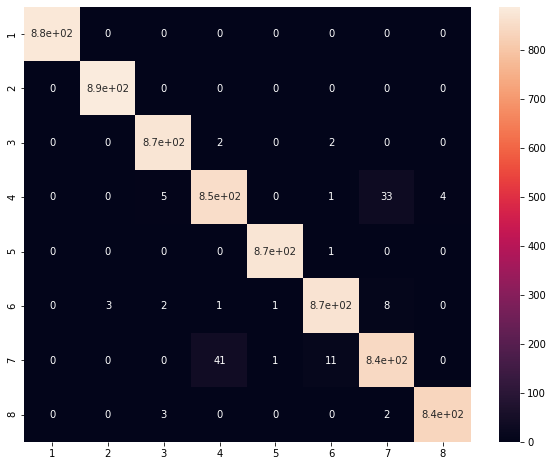

In [40]:
#Cross Validation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score,precision_score
    
#confusion matrix   
cm_logreg = confusion_matrix(y_test, y_results_logreg)
array = cm_logreg 
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)
#accuracy
accuracy_logreg = accuracy_score(y_test, y_results_logreg)
print("accuracy:{}".format(accuracy_logreg))
#F1 score    
f1_score_logreg = f1_score(y_test, y_results_logreg, average='weighted')
print("f1_score:{}".format(f1_score_logreg))
#Recall score
recall_score_logreg = recall_score(y_test, y_results_logreg, average='micro')
print("recall_score:{}".format(recall_score_logreg))
#Precision score
precision_score_logreg = precision_score(y_test, y_results_logreg, average='micro')
print("precision_score:{}".format(precision_score_logreg))

In [41]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_logreg, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 1.00000000 1.00000000       879
           2  0.99663300 1.00000000 0.99831366       888
           3  0.98868778 0.99544419 0.99205448       878
           4  0.95100223 0.95206243 0.95153203       897
           5  0.99771429 0.99885584 0.99828473       874
           6  0.98301246 0.98301246 0.98301246       883
           7  0.95157658 0.94097996 0.94624860       898
           8  0.99524941 0.99406880 0.99465875       843

    accuracy                      0.98281250      7040
   macro avg  0.98298447 0.98305296 0.98301309      7040
weighted avg  0.98276140 0.98281250 0.98278125      7040

